# Belgium Rail Network EDA
Exploring GTFS data for NMBS/SNCB rail network using Pandas and visualizations.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load GTFS data
stops = pd.read_csv('data/stops.txt')
routes = pd.read_csv('data/routes.txt')
trips = pd.read_csv('data/trips.txt')
stop_times = pd.read_csv('data/stop_times.txt')

In [5]:
# Quick testing
print("First few rows of stops.txt:")
display(stops.head())

First few rows of stops.txt:


,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,platform_code,stop_timezone
0,8007817,NaN,Berlin Ostbahnhof (DE),NaN,52.51060,13.435000,NaN,NaN,0,NaN,NaN,NaN
1,8014008,NaN,Mannheim Hbf (DE),NaN,49.47948,8.468935,NaN,NaN,0,NaN,NaN,NaN
2,8015190,NaN,Herzogenrath,NaN,50.87090,6.094400,NaN,NaN,0,NaN,NaN,NaN
3,8015199,NaN,Aix-la-Chapelle Ouest,NaN,50.78078,6.070550,NaN,NaN,0,NaN,NaN,NaN
4,8015345,NaN,Aachen Hbf (DE),NaN,50.76776,6.091390,NaN,NaN,0,NaN,NaN,NaN


In [8]:
# Check basic info
print("\nStops info:")
print(stops.info())


Stops info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2677 entries, 0 to 2676
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stop_id         2677 non-null   object 
 1   stop_code       0 non-null      float64
 2   stop_name       2677 non-null   object 
 3   stop_desc       0 non-null      float64
 4   stop_lat        2677 non-null   float64
 5   stop_lon        2677 non-null   float64
 6   zone_id         0 non-null      float64
 7   stop_url        0 non-null      float64
 8   location_type   2677 non-null   int64  
 9   parent_station  2045 non-null   object 
 10  platform_code   1492 non-null   object 
 11  stop_timezone   0 non-null      float64
dtypes: float64(7), int64(1), object(4)
memory usage: 251.1+ KB
None


In [9]:
# Checking for missing values
print("\nMissing values in stops:")
print(stops.isnull().sum())


Missing values in stops:
stop_id              0
stop_code         2677
stop_name            0
stop_desc         2677
stop_lat             0
stop_lon             0
zone_id           2677
stop_url          2677
location_type        0
parent_station     632
platform_code     1185
stop_timezone     2677
dtype: int64


In [10]:
# Basic statistics
print("\nSummary statistics for stops:")
print(stops.describe())


Summary statistics for stops:
       stop_code  stop_desc     stop_lat     stop_lon  zone_id  stop_url  \
count        0.0        0.0  2677.000000  2677.000000      0.0       0.0   
mean         NaN        NaN    50.732391     4.487261      NaN       NaN   
std          NaN        NaN     0.363385     0.767864      NaN       NaN   
min          NaN        NaN    48.880110     2.354577      NaN       NaN   
25%          NaN        NaN    50.509210     4.026137      NaN       NaN   
50%          NaN        NaN    50.772070     4.411290      NaN       NaN   
75%          NaN        NaN    50.978260     4.925810      NaN       NaN   
max          NaN        NaN    52.525600    13.435000      NaN       NaN   

       location_type  stop_timezone  
count    2677.000000            0.0  
mean        0.206575            NaN  
std         0.404923            NaN  
min         0.000000            NaN  
25%         0.000000            NaN  
50%         0.000000            NaN  
75%         0.0000

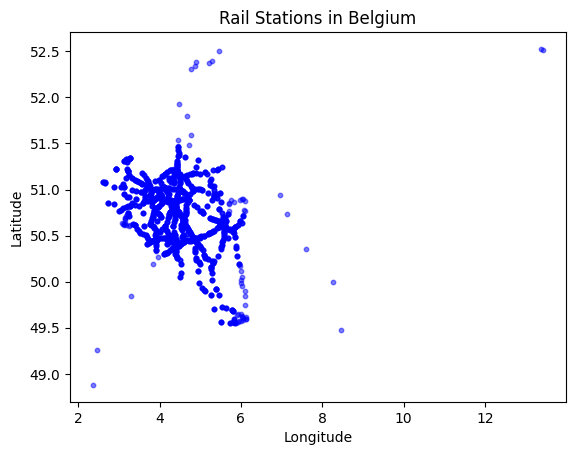

In [11]:
# Simple visualization: Plot station locations
plt.scatter(stops['stop_lon'], stops['stop_lat'], s=10, c='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Rail Stations in Belgium')
plt.show()